In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue

# Custom activation logic

dinkum supports custom cis-regulatory logic, in which you can write your arbitrary function of regulatory inputs.

You have to write a function of the gene names & then returns a True or a False. See `custom_and`, `custom_or`, and `custom_not`, below.

initializing: dinkum v0.3
start=1 stop=3
custom cis-regulatory logic: and! inputs: gene X=True, gene Y=False => gene active? False
custom cis-regulatory logic: and! inputs: gene X=True, gene Y=True => gene active? True


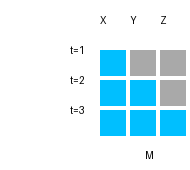

In [2]:
dinkum.reset()

def custom_and(X, Y):
    is_active = (X and Y)
    print(f"custom cis-regulatory logic: and! inputs: gene X={X}, gene Y={Y} => gene active? {is_active}")
    return is_active

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1)
y.is_present(where=m, start=2)
z.custom_activation(state_fn=custom_and, delay=1)

dinkum.run_and_display(stop=3)

initializing: dinkum v0.3
start=1 stop=3
custom cis-regulatory logic: or! inputs: gene X=True, gene Y=False => gene active? True
custom cis-regulatory logic: or! inputs: gene X=True, gene Y=True => gene active? True


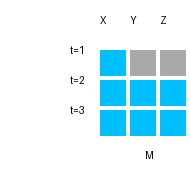

In [3]:
dinkum.reset()

def custom_or(X, Y):
    is_active = (X or Y)
    print(f"custom cis-regulatory logic: or! inputs: gene X={X}, gene Y={Y} => gene active? {is_active}")
    return is_active

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1)
y.is_present(where=m, start=2)
z.custom_activation(state_fn=custom_or, delay=1)

dinkum.run_and_display(stop=3)

initializing: dinkum v0.3
start=1 stop=3
custom cis-regulatory logic: not! inputs: gene X=False => gene active? True
custom cis-regulatory logic: not! inputs: gene X=True => gene active? False


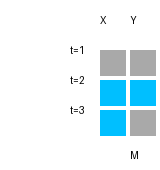

In [4]:
dinkum.reset()

def custom_not(X):
    is_active = not X
    print(f"custom cis-regulatory logic: not! inputs: gene X={X} => gene active? {is_active}")
    return is_active

x = Gene(name='X')
y = Gene(name='Y')
m = Tissue(name='M')

x.is_present(where=m, start=2)
y.custom_activation(state_fn=custom_not, delay=1)

dinkum.run_and_display(stop=3)

## Building more complex input functions

You can build input functions that take arbitrary numbers of genes (not just two) and apply more complex logic operations to them.

Here's one that activates the downstream gene if one of A and B are active, and one of C and D are active: (A or B) and (C or D).

initializing: dinkum v0.3
start=1 stop=7
custom cis-regulatory logic! inputs: gene A=True, gene B=False, gene C=False, gene D=False => gene active? False
custom cis-regulatory logic! inputs: gene A=True, gene B=True, gene C=False, gene D=False => gene active? False
custom cis-regulatory logic! inputs: gene A=False, gene B=True, gene C=True, gene D=False => gene active? True
custom cis-regulatory logic! inputs: gene A=False, gene B=True, gene C=True, gene D=True => gene active? True
custom cis-regulatory logic! inputs: gene A=False, gene B=False, gene C=True, gene D=True => gene active? False
custom cis-regulatory logic! inputs: gene A=False, gene B=False, gene C=False, gene D=False => gene active? False


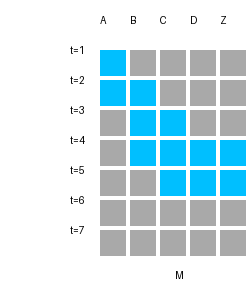

In [5]:
dinkum.reset()

def custom_complex(A, B, C, D):
    is_active = (A or B) and (C or D)
    print(f"custom cis-regulatory logic! inputs: gene A={A}, gene B={B}, gene C={C}, gene D={D} => gene active? {is_active}")
    return is_active

a = Gene(name='A')
b = Gene(name='B')
c = Gene(name='C')
d = Gene(name='D')
z = Gene(name='Z')
m = Tissue(name='M')

a.is_present(where=m, start=1, duration=2)
b.is_present(where=m, start=2, duration=3)
c.is_present(where=m, start=3, duration=3)
d.is_present(where=m, start=4, duration=2)
z.custom_activation(state_fn=custom_complex, delay=1)

dinkum.run_and_display(stop=7)

## Building input functions with stochasticity

You can use the `random` module to introduce stochastic gene activation (either unbiased - 50/50 - or biased).

Here's a function that activates the gene based on an even coin flip (`random.choice([True, False])`).

initializing: dinkum v0.3
start=1 stop=5
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? True
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? True
custom cis-regulatory logic: random! gene active? True
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? True
custom cis-regulatory logic: random! gene active? False
custom cis-regulatory logic: random! gene active? True


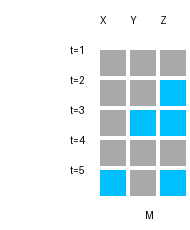

In [6]:
dinkum.reset()

def custom_random(X, Y):
    import random
    
    is_active = random.choice([True, False])
    print(f"custom cis-regulatory logic: random! gene active? {is_active}")
    return is_active

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.custom_activation(state_fn=custom_random, delay=1)
y.custom_activation(state_fn=custom_random, delay=1)
z.custom_activation(state_fn=custom_random, delay=1)

dinkum.run_and_display(stop=5)

### Biased stochastic activation

You can also use other functions from the Python random library, e.g. `randrange`, which lets you select randomly from a range of numbers.

Using this you can implement a biased stochastic activation function that (for example) activates a gene 80% of the time.

See [the docs for the `random` module for more information](https://docs.python.org/3/library/random.html).

### Stochastic but reproducible

When debugging, it can be annoying to get new random behavior every time.

You can use `random.seed(NUMBER)` to force the function to return random numbers reproducibly. Use `random.seed(1)` (or any other number) to initialize the [pseudo-random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator).

initializing: dinkum v0.3
start=1 stop=5
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? False
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? False
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? True
custom cis-regulatory logic: random 80%! gene active? False
custom cis-regulatory logic: random 80%! gene active? True


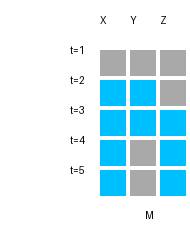

In [7]:
dinkum.reset()

import random
random.seed(1)

def custom_random_biased(X, Y):
    # activate 20% of the time
    is_active = random.randrange(0, 100) < 80
    print(f"custom cis-regulatory logic: random 80%! gene active? {is_active}")
    return is_active

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.custom_activation(state_fn=custom_random_biased, delay=1)
y.custom_activation(state_fn=custom_random_biased, delay=1)
z.custom_activation(state_fn=custom_random_biased, delay=1)

dinkum.run_and_display(stop=5)

## Using lambda functions

Python supports defining functions using `lambda` instead of `def`, and you can use this syntax too; see below.

This can make things shorter, at the expense of readability. It's your call!

Here's a simple example of the `AND` logic used above:

initializing: dinkum v0.3
start=1 stop=5


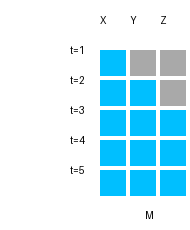

In [8]:
dinkum.reset()

custom_lambda_and = lambda X, Y: X and Y

x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1)
y.is_present(where=m, start=2)

z.custom_activation(state_fn=custom_lambda_and, delay=1)

dinkum.run_and_display(stop=5)